In [1]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
X = torch.tensor(iris.data).float()
y = torch.tensor(iris.target)

In [3]:
# dropout layer

class Dropout(nn.Module):
    def __init__(self):
        super().__init__()
        #self.x = x
        
    def forward(self,x,drop):
        
        get_shape = x.shape
        not_drop = 1 - drop
        output = x*torch.tensor(np.random.choice([0,1],x.shape,p=[drop,not_drop]))
        
        return output
        

In [4]:
# neural network

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        
        super(NeuralNetwork,self).__init__()
        self.l1 = nn.Linear(4,4)
        self.l2 = nn.Linear(4,3)
        self.drop = Dropout()
        self.softmax = nn.Softmax(dim=0)
    
    def forward(self,x):
        
        out = self.l1(x)
        out = self.drop(out,0.5)
        out = self.l2(out)
        out = self.softmax(out)
        
        return out

In [5]:
net = NeuralNetwork()
print(net)

NeuralNetwork(
  (l1): Linear(in_features=4, out_features=4, bias=True)
  (l2): Linear(in_features=4, out_features=3, bias=True)
  (drop): Dropout()
  (softmax): Softmax(dim=0)
)


In [6]:
creatrion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

In [7]:
losses = []


for i in range(1000):
    

    output = net(X)

    loss = creatrion(output, y)
    
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
        
    

    if i%100 == 0:
        losses.append(loss.item())
        print(loss.item())

1.0993261337280273
1.0990196466445923
1.0969682931900024
1.0967131853103638
1.0932177305221558
1.0918484926223755
1.0912659168243408
1.0903873443603516
1.0904936790466309
1.0900688171386719


In [8]:
%matplotlib inline

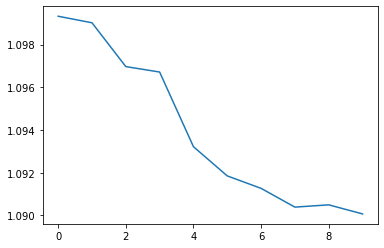

In [9]:
plt.plot(losses)